In [1]:
from mcm_orh_functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import inspect


import warnings
warnings.filterwarnings("ignore")


orh_data = pd.read_csv('./orh_2022.csv')

#orh_data

In [2]:
orh_data = format_orh(orh_data)

orh_data.head()

,org,org_house_name,Stage,mother_first_i,father_first_i,fav_color,fav_season,age,out_of_state_to_RH,out_of_county_to_RH,...,recovery_housing_difference_from_other_living_environments,start_date,submission_date,network_id,tags,input_type,Gender,Sexuality,Race,CJS
0,12 step life,12 Step Life: The Ethel Hardy House,Follow Up,N,D,Green,Fall,18-24 years,No,No,...,NaN,12/9/22 4:50,12/9/22 4:55,4a9fc7602d,NaN,Client,Woman,Straight (Heterosexual),Black or African American,Not involved with the criminal justice system
1,12 step life,12 Step Life: The Ethel Hardy House,Follow Up,N,D,Green,Fall,18-24 years,No,No,...,NaN,11/21/22 3:00,11/21/22 3:06,4a9fc7602d,NaN,Client,Woman,Straight (Heterosexual),Black or African American,Not involved with the criminal justice system
2,12 step life,12 Step Life: The Ethel Hardy House,Follow Up,L,W,Red,Summer,60-64 years,No,No,...,NaN,9/23/22 1:03,9/23/22 1:08,4a9fc7602d,NaN,Client,Woman,Straight (Heterosexual),Black or African American,Not involved with the criminal justice system
3,12 step life,12 Step Life: The Ethel Hardy House,Follow Up,V,T,Blue,Summer,35-39 years,No,No,...,NaN,9/23/22 0:25,9/23/22 0:32,4a9fc7602d,NaN,Client,Woman,Straight (Heterosexual),White,Currently on parole/probation
4,12 Step Life/Ethel Hardy House,12 Step Life: The Ethel Hardy House,Follow Up,L,W,Blue,Fall,60-64 years,No,No,...,NaN,7/24/22 5:41,7/24/22 5:48,4a9fc7602d,NaN,Client,Woman,Straight (Heterosexual),Black or African American,Not involved with the criminal justice system


In [11]:
import os
def orh_race(input_data, stage, plot=False, title=""):

    method_title = "Race Breakdown"
    df = input_data[input_data['Stage'] == stage]

    rb = pd.DataFrame(df['Race'])
    rb.columns = ["Race_id"]

    df = rb.groupby('Race_id').size().reset_index(name='count')
    df = df.sort_values('count', ascending=True)
    df = df.reset_index(drop=True)
    df['percent'] = df['count']/df['count'].sum() * 100
    output_table = df.copy()
    output_table[f'Total Sample Size {title}'] = output_table['count'].sum()
    print(f"{method_title} {title}: Sample Size = {df['count'].sum()}")
    print(f"\n{method_title} {title}: Summary Table")
    print("============================================")
    print(f"{df}")
    print("============================================\n\n")

    if plot is True:
        # Set the plot style and color palette
        sns.set_style('whitegrid')
        sns.set_palette('muted')

        fig, ax = plt.subplots()
        ax.bar(df['Race_id'],
                df['count'])

        ax.set_xticklabels(df['Race_id'],rotation=45, ha='right')
        ax.set_xlabel('Race: Self Identification')
        ax.set_ylabel('count')
        if title == "":
            ax.set_title(f'ORH Breakdown Race Breakdown - Self Identification: {stage}')
        else:
            ax.set_title(f'{title} - ORH Breakdown Race Breakdown - Self Identification: {stage}')

        for i, percent in enumerate(df['percent']):
            ax.text(i,
                    df['count'][i]+0.5,
                    f'{percent:.2f}%',
                    ha='center',
                    va='bottom')

        ax.set_ylim([0, df['count'].max()*1.1])

        # Customize plot
        fig.set_size_inches(8, 6)
        ax.tick_params(axis='both',
                       which='major',
                       labelsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.grid(True)

        plt.tight_layout()
        plt.show()

    # Check if directory exists and create it if not
    output_directory = f'./ORH_Output_{date.today()}/Cohort_Comparisons'
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Save the output table to the new directory
    output_table.to_csv(f'{output_directory}/{method_title}_{title}_{date.today()}.csv')

In [12]:
#orh_sexuality(orh_male, stage = 'Move In', plot = True, title = "Male")
orh_race(orh_male, title ="Male", stage = 'Move In')

#def orh_cohort_summary(data, title, stage = 'Move In', plot = False):

Race Breakdown Male: Sample Size = 1310

Race Breakdown Male: Summary Table
                            Race_id  count    percent
0                       Other Asian      1   0.076336
1            Other Pacific Islander      1   0.076336
2                          Filipino      2   0.152672
3  American Indian or Alaska Native      8   0.610687
4              Prefer not to answer     11   0.839695
5                             Other     33   2.519084
6         Black or African American    215  16.412214
7                             White   1039  79.312977




In [6]:
#orh_data['input_type'].value_counts()

#orh_data[(orh_data['Stage'] == 'Move Out') & (orh_data['input_type']=='Client')]['Gender'].value_counts()

orh_cohort_comp_summary(orh_white, orh_bipoc, title1='White', title2='BIPOC', stage='Move In', plot=False)

Age Breakdown White: Sample Size = 1968

Age Breakdown White: Summary Table
   age_range  count    percent
0      18-24    160   8.130081
1      25-29    299  15.193089
2      30-34    419  21.290650
3      35-39    352  17.886179
4      40-44    278  14.126016
5      45-49    177   8.993902
6      50-54    127   6.453252
7      55-59     99   5.030488
8      60-64     41   2.083333
9      65-69     12   0.609756
10       70+      4   0.203252


Age Breakdown BIPOC: Sample Size = 450

Age Breakdown BIPOC: Summary Table
   age_range  count    percent
0      18-24     36   8.000000
1      25-29     58  12.888889
2      30-34     67  14.888889
3      35-39     71  15.777778
4      40-44     46  10.222222
5      45-49     47  10.444444
6      50-54     55  12.222222
7      55-59     35   7.777778
8      60-64     25   5.555556
9      65-69      7   1.555556
10       70+      3   0.666667























Highest Educational Degree White: Sample Size = 945

Highest Educational Degree 

In [3]:
orh_female = orh_data[(orh_data['Gender'] == 'Woman')]
orh_male = orh_data[(orh_data['Gender'] == 'Man')]

female_title = "Female Identifying"
male_title = "Male Identifying"


#orh_cohort_comp_summary(orh_female, orh_male, female_title, male_title)

#orh_outcome_comp_summary(orh_female, orh_male, female_title, male_title)

#orh_full_comparison(orh_female, orh_male, female_title, male_title)

#orh_outcome_prog(orh_female)



# Identify key differences between Cohorts - goal is to establish a narrative

# Do we need to provide more for certain groups?


- What do the cohort of residents with criminal justice histories look like compared to the cohort of residents who do not have such histories
- What do the cohort of residents who are parents look like compared to the cohort of residents who are not parents?
- What do the cohort of women residents look like compared to the cohort of residents who identify as men?
- What do the cohort of LGTBQ+ residents look like compared to the cohort that do not identify as LGBTQIA+
- How do cohorts differ by race?
- How do people who stayed longer than a month differ from those who stayed less than a month?

### Grouping Definitions

Yes                     1058
No                       662
Prefer not to answer      46
Name: parent, dtype: int64

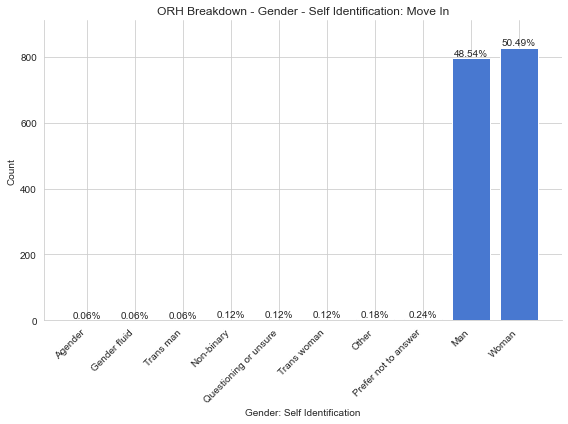

               Gender_id  Count  percent
0                Agender      1     0.06
1           Gender fluid      1     0.06
2              Trans man      1     0.06
3             Non-binary      2     0.12
4  Questioning or unsure      2     0.12
5            Trans woman      2     0.12
6                  Other      3     0.18
7   Prefer not to answer      4     0.24
8                    Man    796    48.54
9                  Woman    828    50.49


In [14]:
def orh_gender(input_data, stage, graph_title = ""):
        
        df = input_data[input_data['Stage'] == stage]

        gb = pd.DataFrame(df['Gender'])

        gb.columns = ["Gender_id"]

        df = gb.groupby('Gender_id').size().reset_index(name='Count')

        df = df.sort_values('Count', ascending=True)
        df = df.reset_index(drop=True)

        # Set the plot style and color palette
        sns.set_style('whitegrid')
        sns.set_palette('muted')

        fig, ax = plt.subplots()
        ax.bar(df['Gender_id'],
                df['Count'])

        ax.set_xticklabels(df['Gender_id'],rotation=45, ha='right')
        ax.set_xlabel('Gender: Self Identification')
        ax.set_ylabel('Count')
        if graph_title == "":
            ax.set_title(f'ORH Breakdown - Gender - Self Identification: {stage}')
        else:
            ax.set_title(f'{graph_title} - ORH Breakdown - Gender - Self Identification: {stage}')

        df['percent'] = round(df['Count']/df['Count'].sum(),4) * 100

        for i, percent in enumerate(df['percent']):
                ax.text(i, 
                        df['Count'][i]+0.5, 
                        f'{percent:.2f}%', 
                        ha='center', 
                        va='bottom')
                
        ax.set_ylim([0, df['Count'].max()*1.1])
        
        # Customize plot
        fig.set_size_inches(8, 6)
        ax.tick_params(axis = 'both',
                which='major',
                labelsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.grid(True)

        plt.tight_layout()
        plt.show()

        print(df)

In [5]:
# Criminal Justice Histories

orh_cjs = orh_data[(orh_data['CJS'] == 'Currently participating in drug court') |
                   (orh_data['CJS'] == 'Currently on parole/probation')]
orh_no_cjs = orh_data[orh_data['CJS'] == 'Not involved with the criminal justice system']
cjs_title = "Criminal Justice History"
no_cjs_title = "No Criminal Justice History"

# Parents

orh_parent = orh_data[(orh_data['parent'] == 'Yes')]
orh_non_parent = orh_data[(orh_data['parent'] == 'No')]
parent_title = "Parent"
non_parent_title = "Not Parent"

# Male vs Female

orh_female = orh_data[(orh_data['Gender'] == 'Woman')]
orh_male = orh_data[(orh_data['Gender'] == 'Man')]
female_title = "Female Identifying"
male_title = "Male Identifying"

# Sexuality
orh_lgbtq = orh_data[orh_data['Sexuality'] != 'Straight (Heterosexual)']
orh_str= orh_data[orh_data['Sexuality'] == 'Straight (Heterosexual)']
lgbtq_title = "LGBTQ+"
str_title = "Heterosexual"

# Race
orh_white = orh_data[orh_data['Race'] == 'White']
orh_bipoc = orh_data[(orh_data['Race'] != 'White') & (orh_data['Race'] != 'Prefer not to answer')]
white_title = "White"
bipoc_title = "BIPOC"

# Under a month vs Over a month
orh_under_month = orh_data[(orh_data['move_out_recovery_housing_stay_time_period'] == 'Less than a week') |
                           (orh_data['move_out_recovery_housing_stay_time_period'] == '1-4 weeks (i.e., a month or less)')]

orh_over_month = orh_data[(orh_data['move_out_recovery_housing_stay_time_period'] == '5-26 weeks (i.e., six months or less)') |
                           (orh_data['move_out_recovery_housing_stay_time_period'] == '27-52 weeks (i.e., six months to a year)') |
                           (orh_data['move_out_recovery_housing_stay_time_period'] == 'More than a year')]


# Staff vs Client Exit

client_exit = orh_data[(orh_data['Stage']=='Move In') |
         ((orh_data['Stage']=='Move Out')&(orh_data['input_type']=='Client'))]

staff_exit = orh_data[(orh_data['Stage']=='Move In') |
         ((orh_data['Stage']=='Move Out')&(orh_data['input_type']=='Staff'))]

client_title = 'Client Exit'
staff_title = 'Staff Exit'
                        

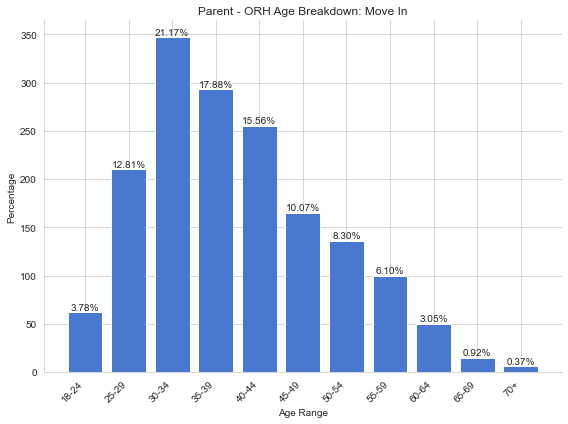

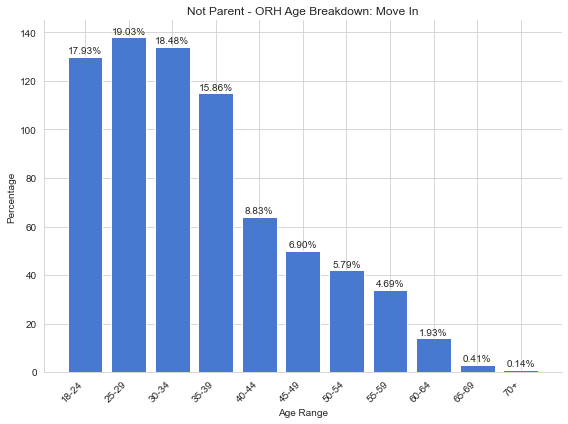

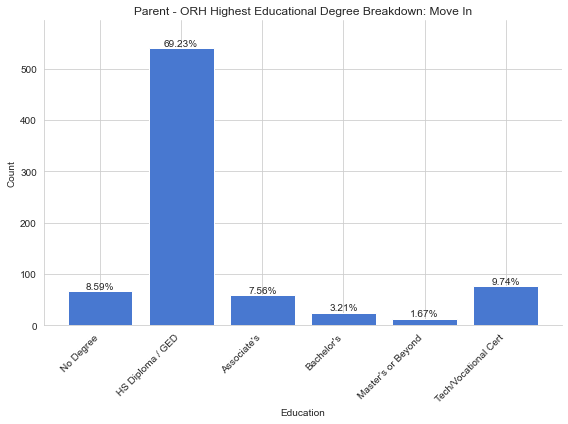

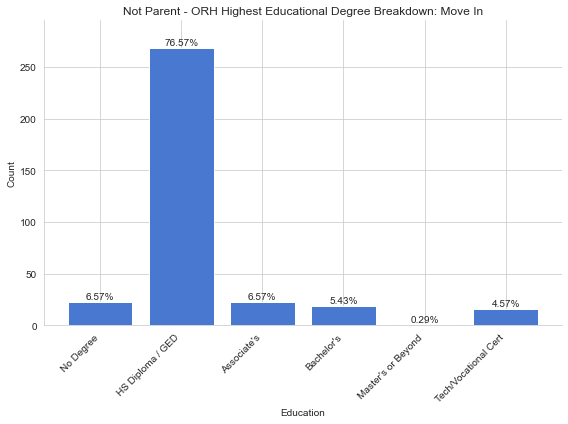

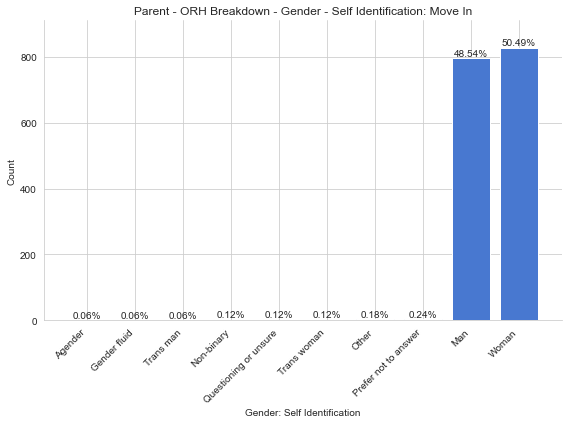

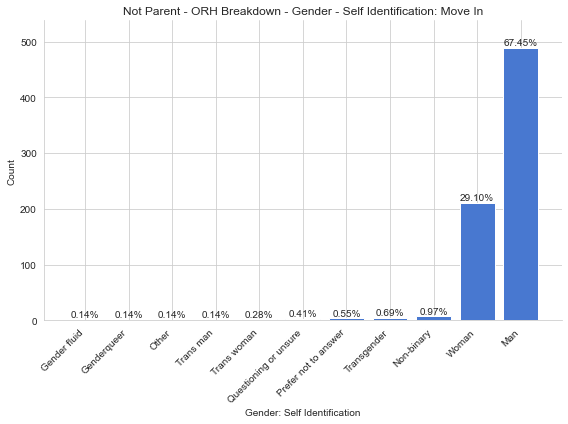

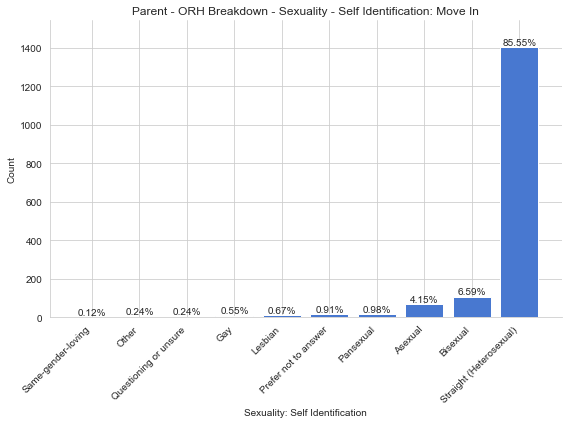

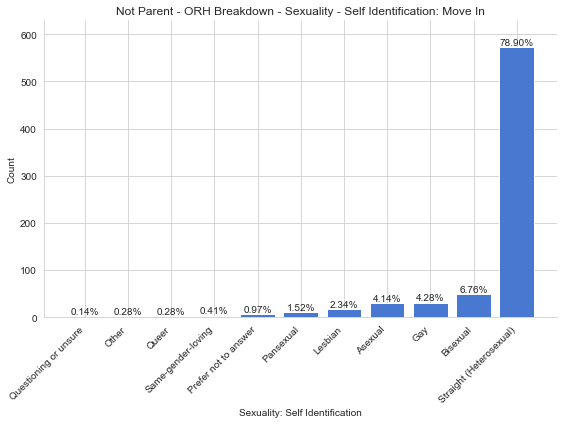

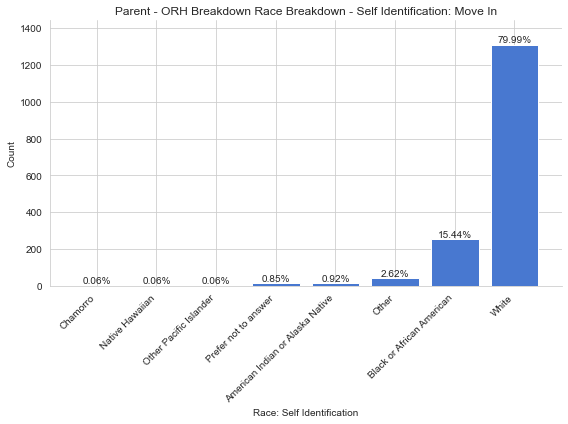

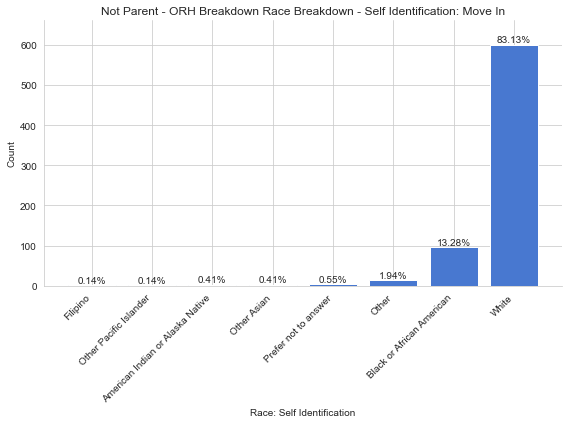

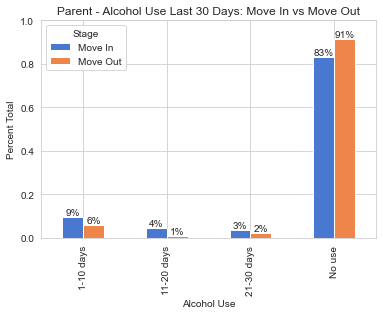

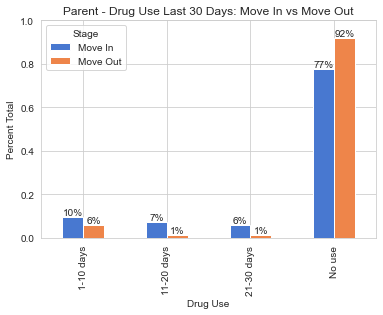

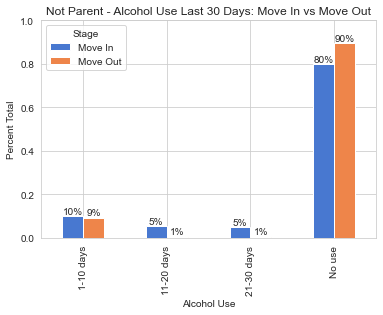

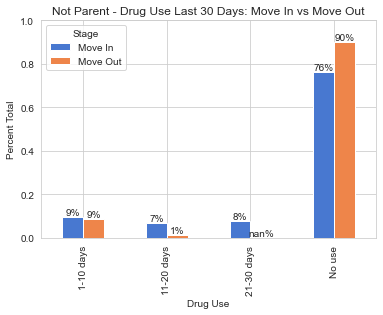

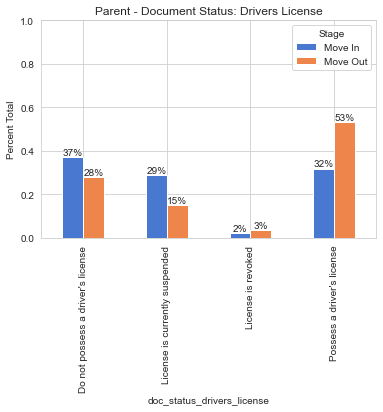

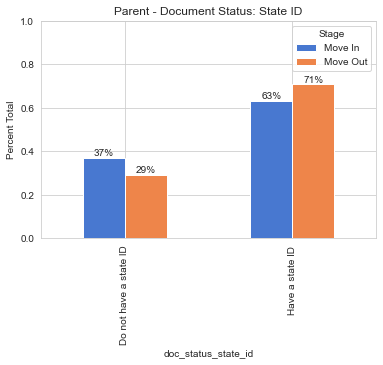

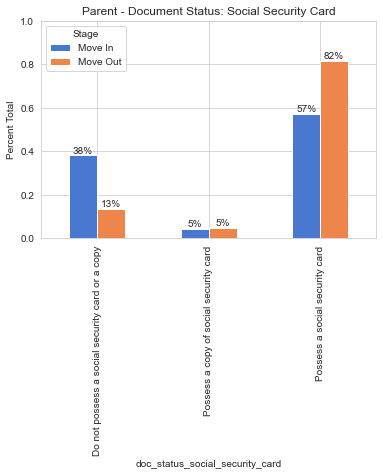

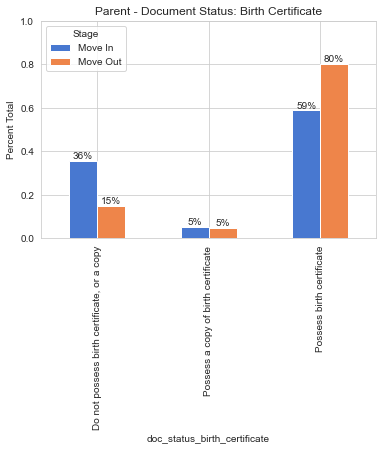

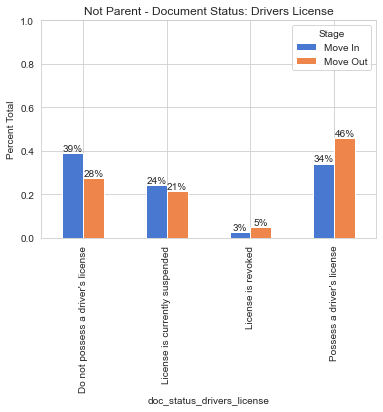

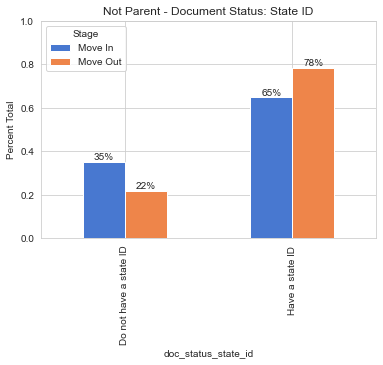

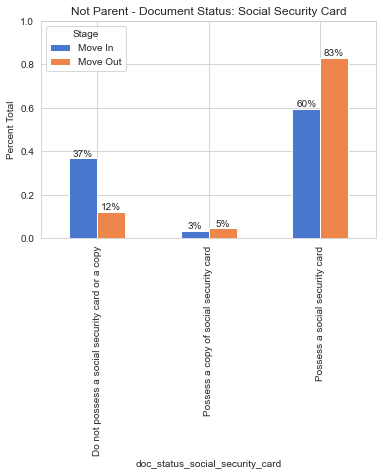

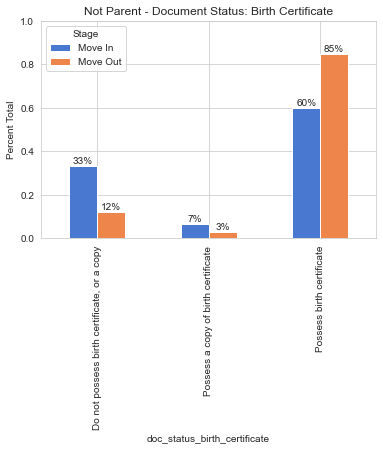

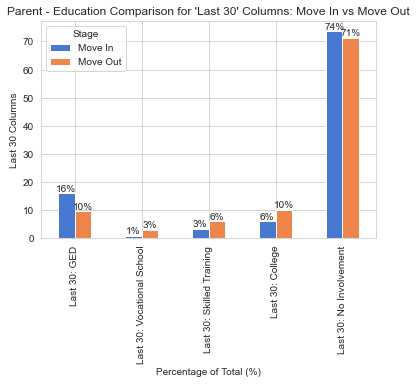

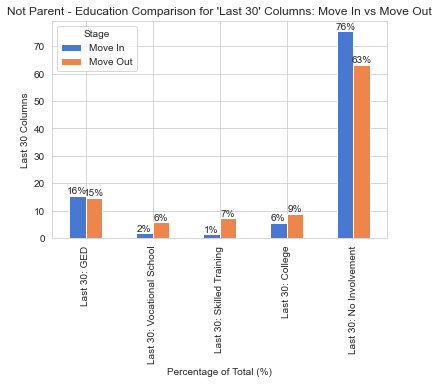

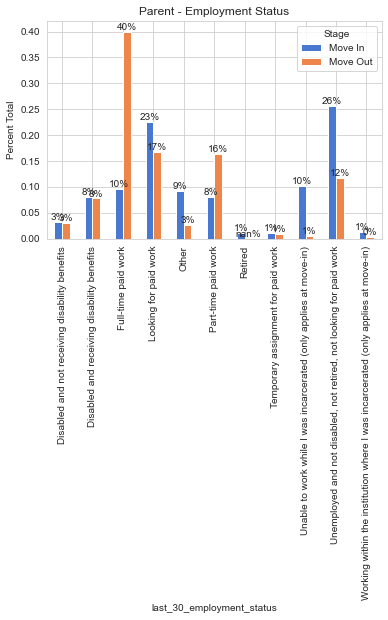

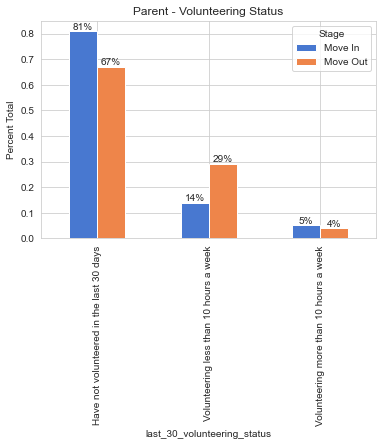

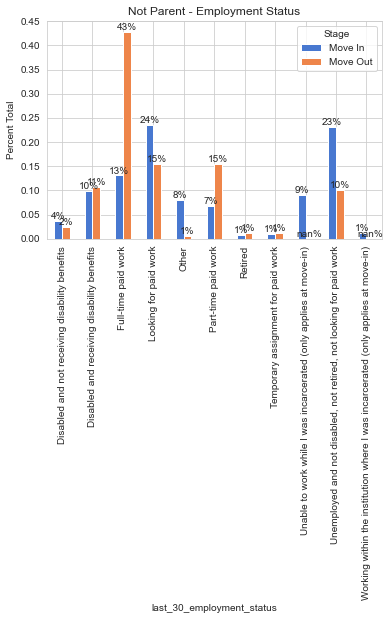

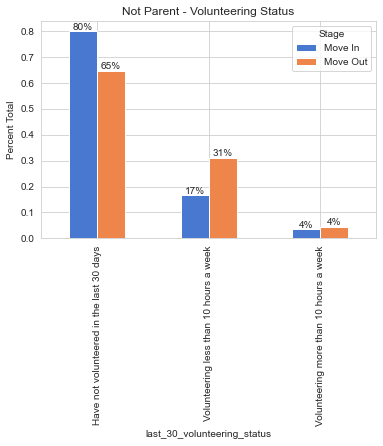

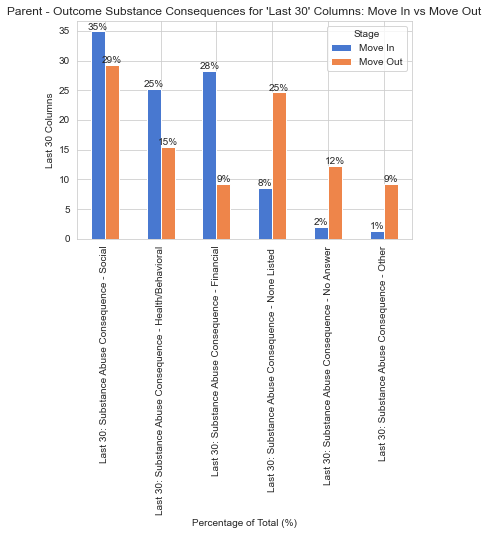

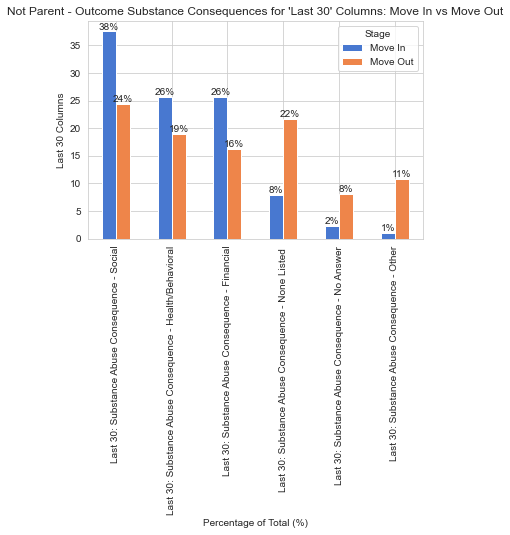

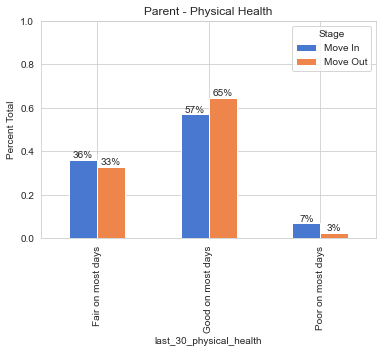

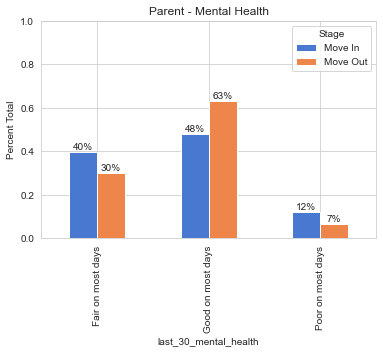

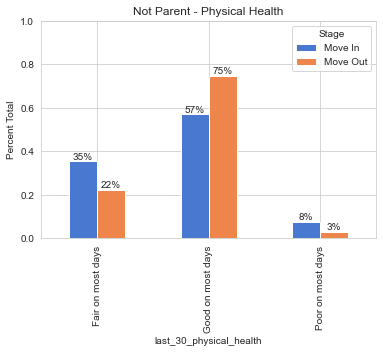

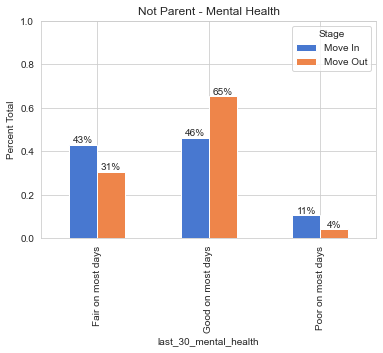

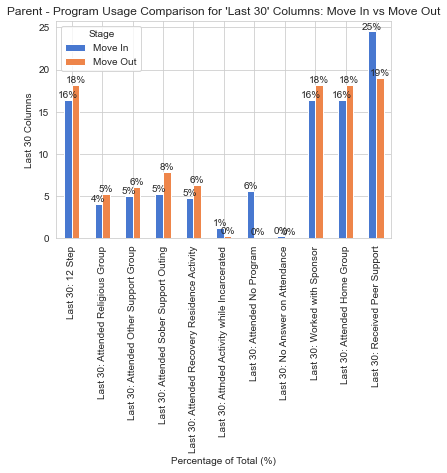

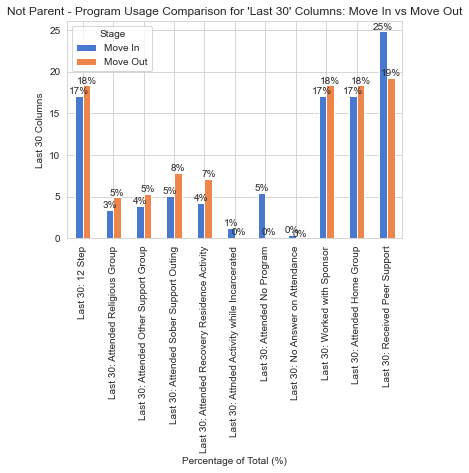

In [5]:
#orh_full_comparison(orh_cjs, orh_no_cjs, cjs_title, no_cjs_title)

#orh_outcome_comp_summary(orh_under_month, orh_over_month, "<= 1 Month", "> 1 Month")

#orh_outcome_comp_summary(client_exit, staff_exit, client_title, staff_title)

orh_full_comparison(orh_parent, orh_non_parent, parent_title, non_parent_title)




In [3]:
client_exit = orh_data[(orh_data['Stage']=='Move In') |
         ((orh_data['Stage']=='Move Out')&(orh_data['input_type']=='Client'))]

staff_exit = orh_data[(orh_data['Stage']=='Move In') |
         ((orh_data['Stage']=='Move Out')&(orh_data['input_type']=='Staff'))]

client_title = 'Client Exit'

staff_title = 'Staff Exit'

In [ ]:
def orh_full_comparison(data1, data2, graph_title1 = '', graph_title2 = '', stage = "Move In"):
     orh_cohort_comp_summary(data1, data2, graph_title1, graph_title2, stage)
     orh_outcome_comp_summary(data1, data2, graph_title1, graph_title2)

In [4]:












for col in orh_data.columns:
    print(col)













org 
org_house_name
Stage
mother_first_i
father_first_i
fav_color
fav_season
age
out_of_state_to_RH
out_of_county_to_RH
gender_identify_agender
gender_identify_genderqueer
gender_identify_gender_fluid
gender_identify_man
gender_identify_non-binary
gender_identify_questioning
gender_identify_transgender
gender_identify_trans_man
gender_identify_trans_woman
gender_identify_woman
gender_identify_no_answer
gender_identify_other
sexual_identity_asexual
sexual_identity_bisexual
sexual_identity_gay
sexual_identity_heterosexual
sexual_identity_lesbian
sexual_identity_pansexual
sexual_identity_queer
sexual_identity_questioning
sexual_identity_same_gender_loving
sexual_identity_no_answer
sexual_identity_other
language
socio_economic_status
health_insurance_status
race_id_white
race_id_black_or_african_american
race_id_american_indian_or_alaska_native
race_id_chinese
race_id_vietnamese
race_id_native_hawaiian
race_id_filipino
race_id_korean
race_id_samoan
race_id_asian_indian
race_id_japanese
rac

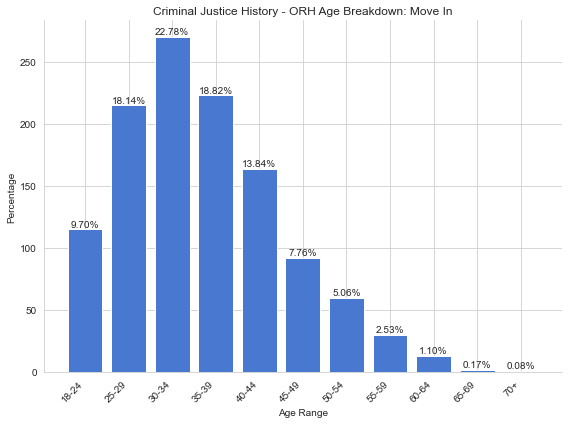

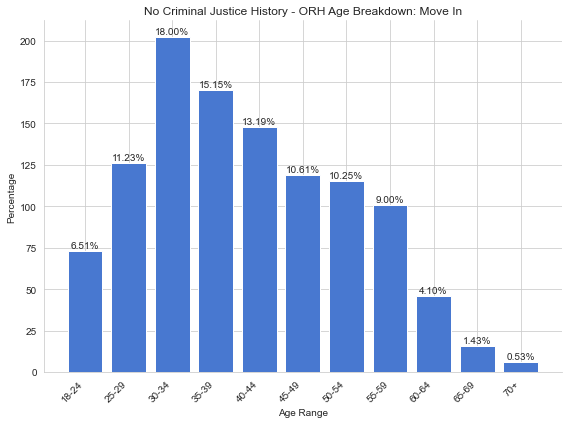

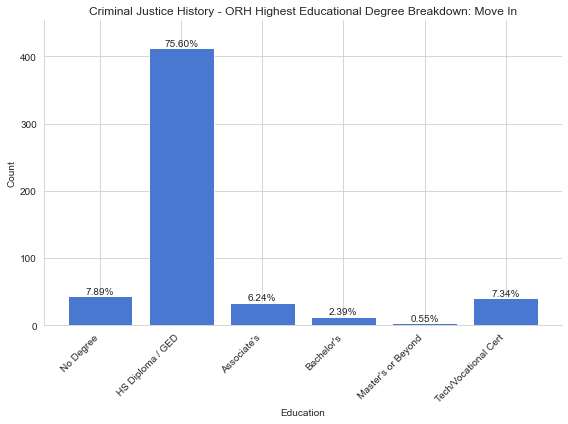

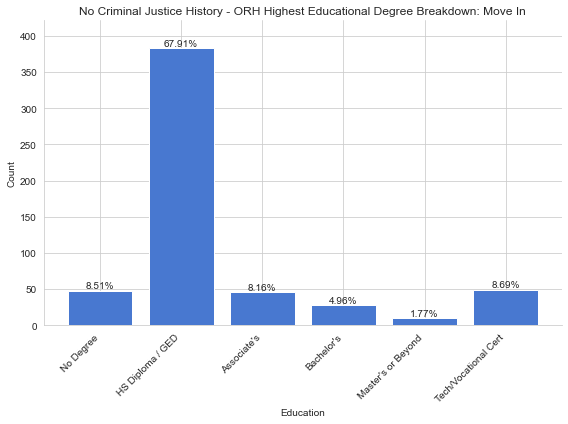

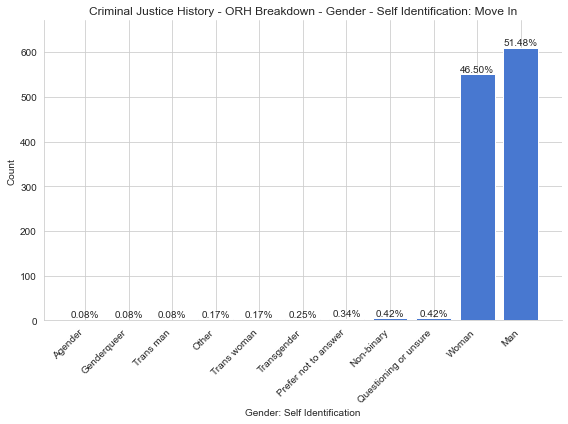

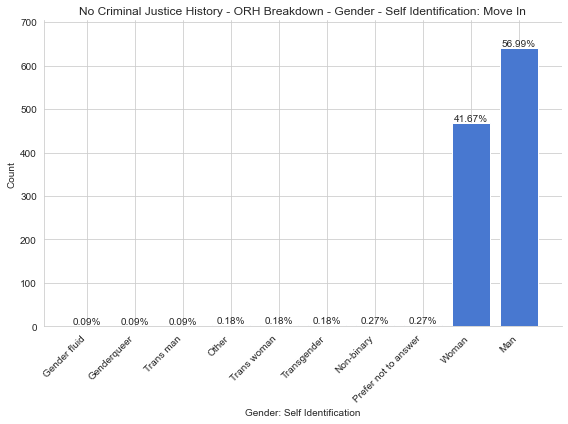

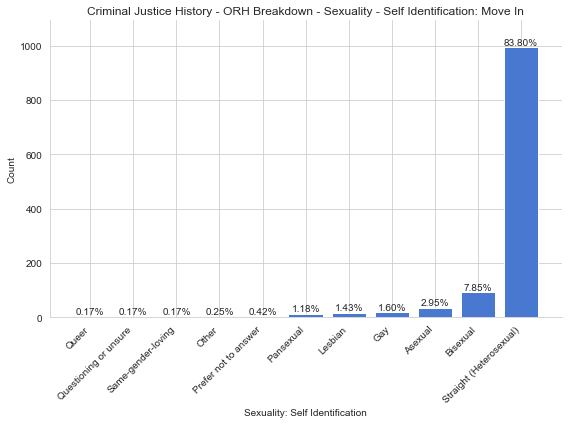

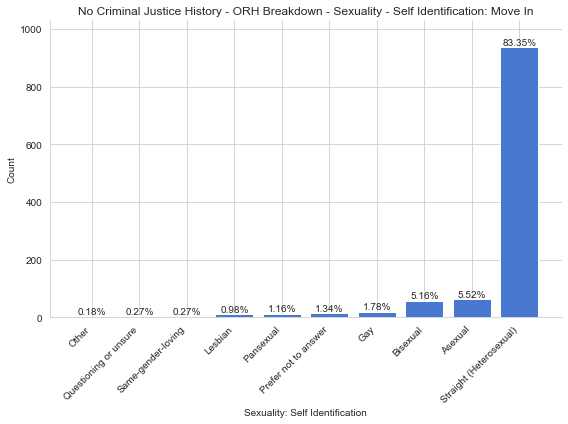

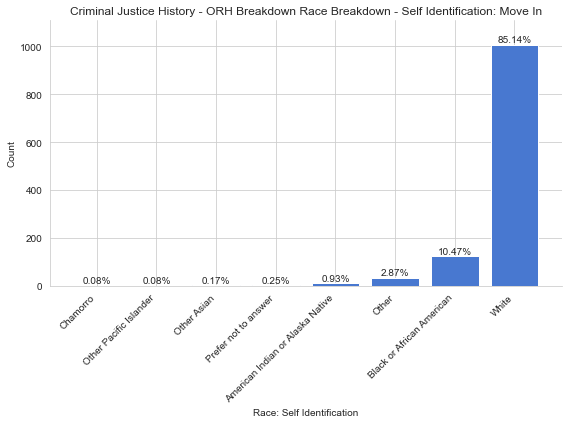

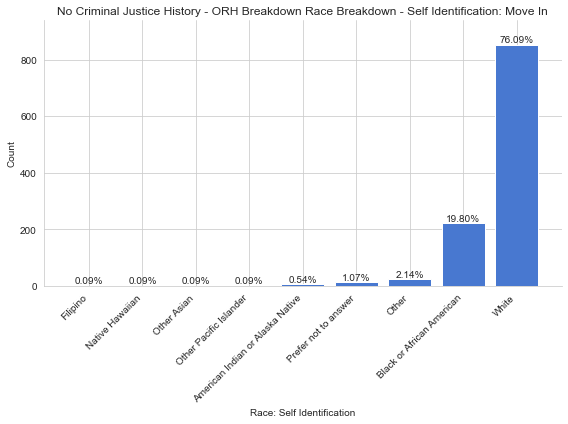

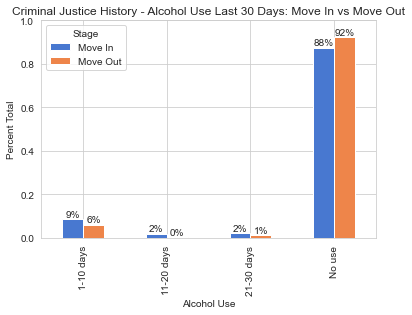

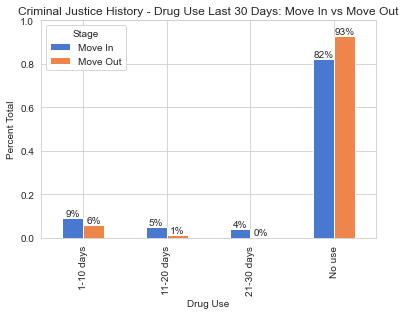

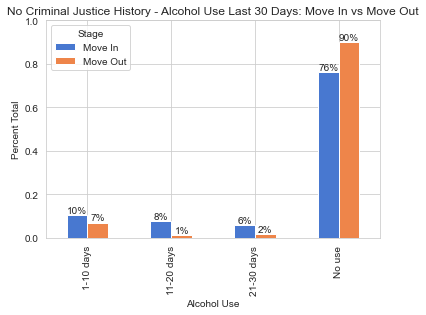

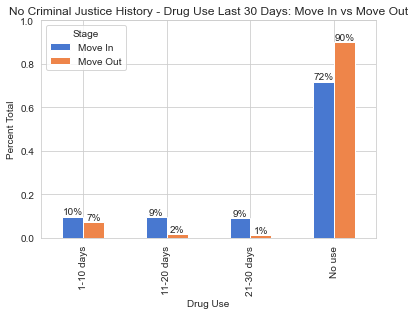

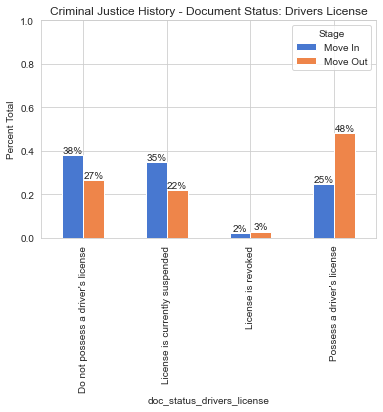

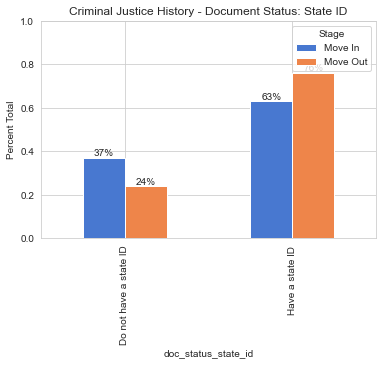

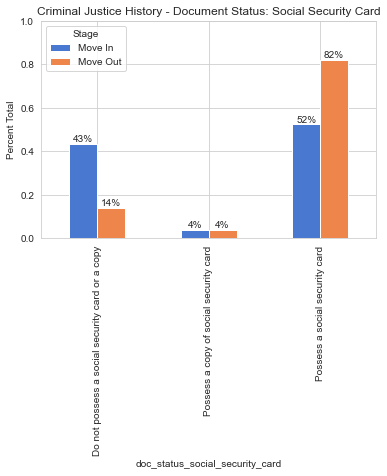

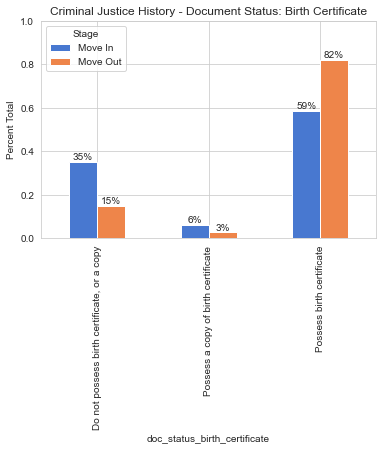

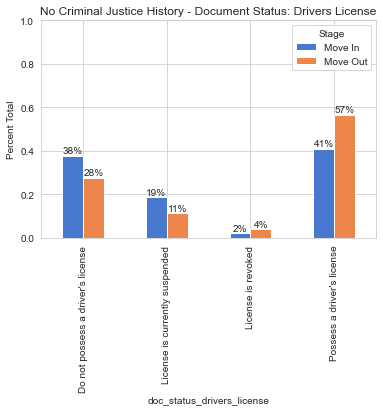

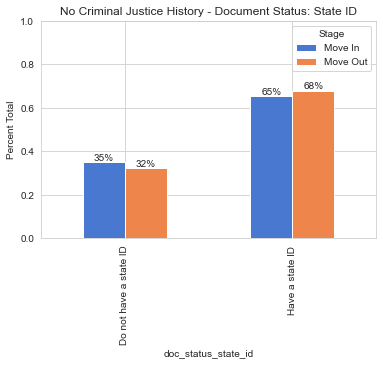

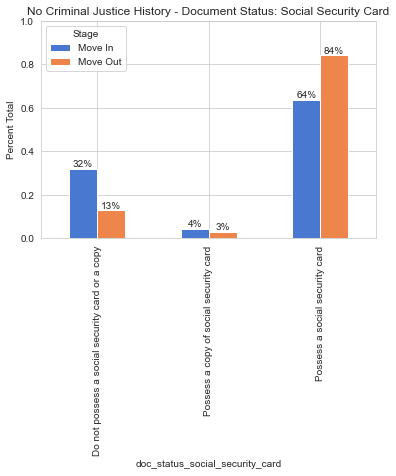

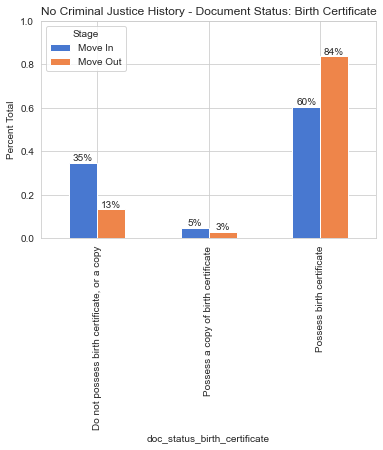

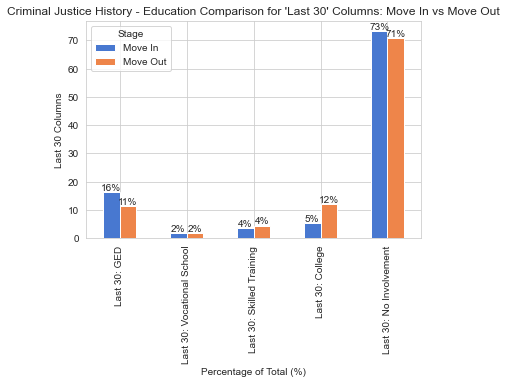

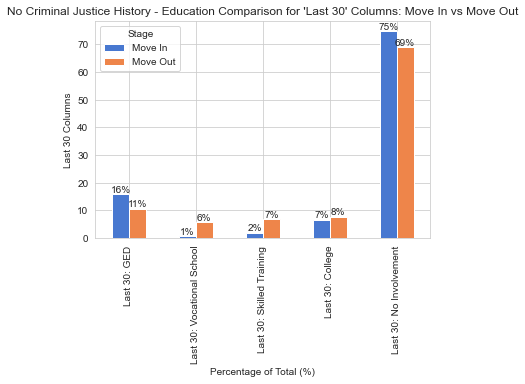

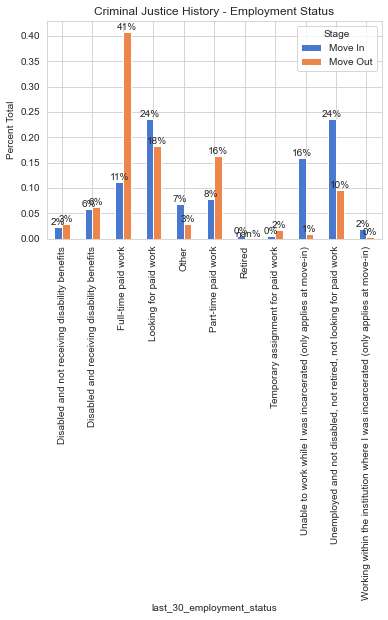

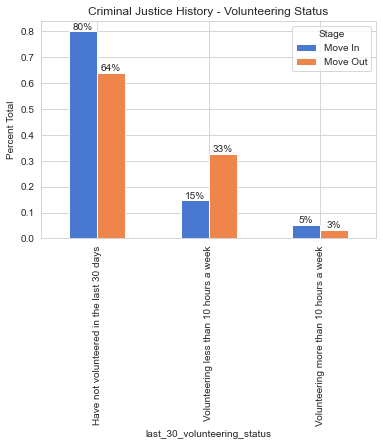

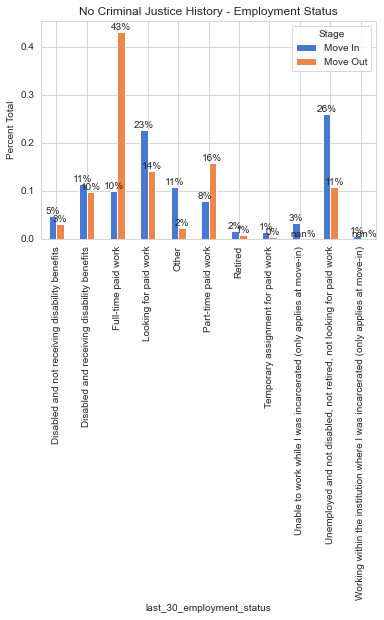

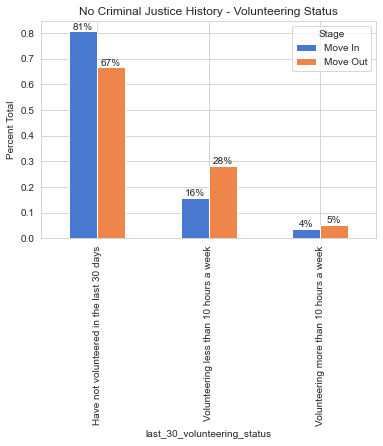

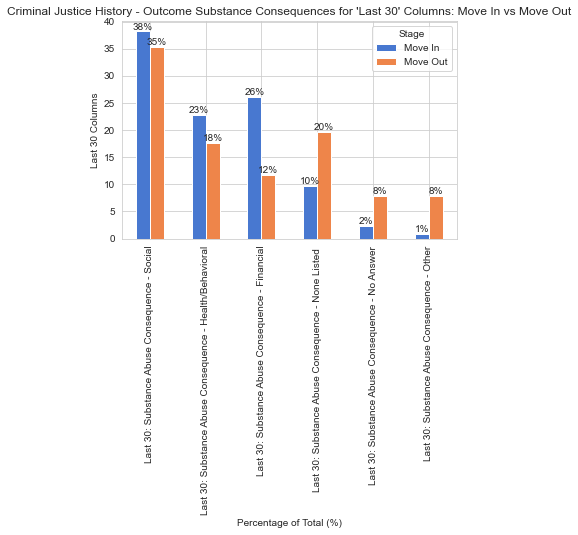

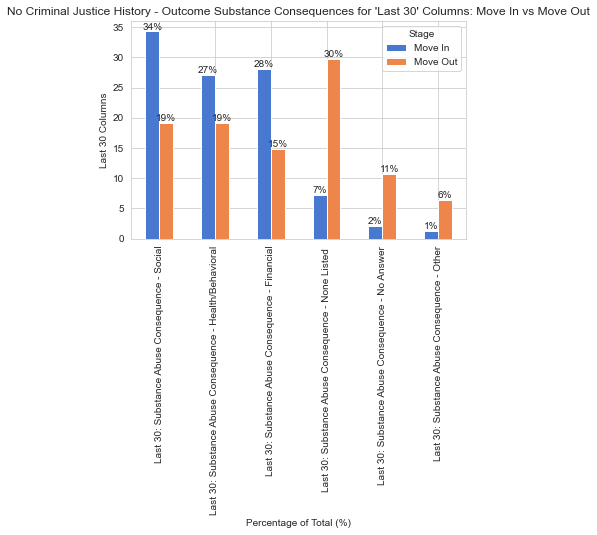

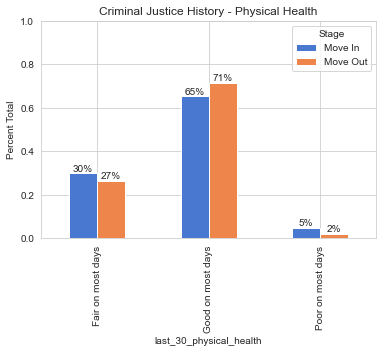

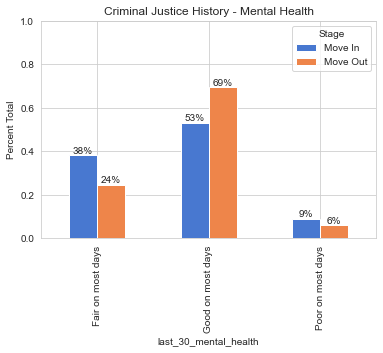

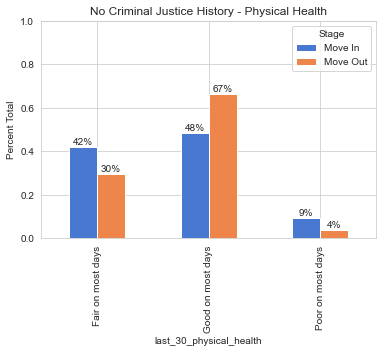

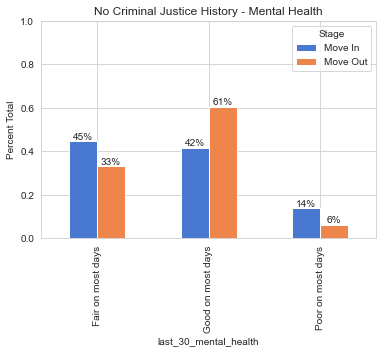

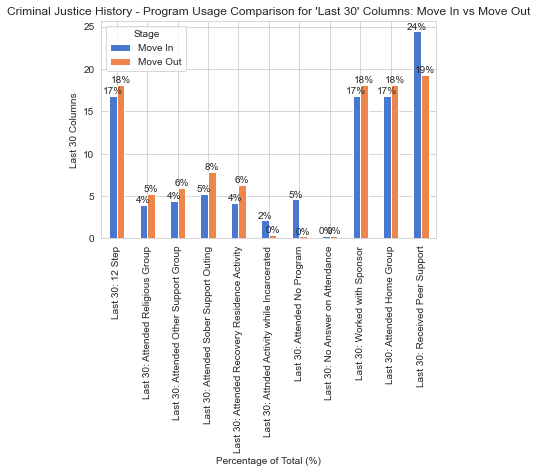

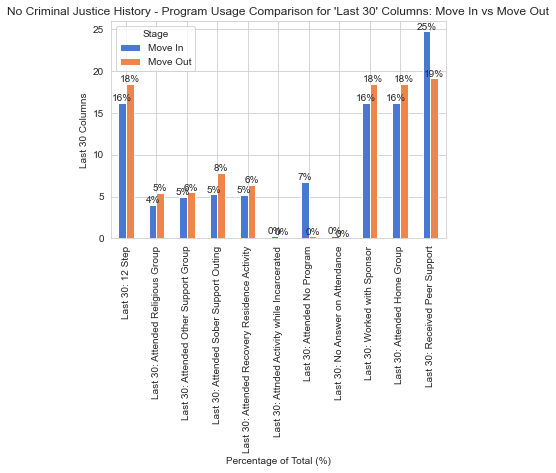

In [4]:
orh_cjs = orh_data[(orh_data['CJS'] == 'Currently participating in drug court') |
                   (orh_data['CJS'] == 'Currently on parole/probation')]


orh_no_cjs = orh_data[orh_data['CJS'] == 'Not involved with the criminal justice system']

cjs_title = "Criminal Justice History"
no_cjs_title = "No Criminal Justice History"


orh_full_comparison(orh_cjs, orh_no_cjs, cjs_title, no_cjs_title)

In [ ]:
orh_cjs = orh_data[(orh_data['CJS'] == 'Currently participating in drug court') |
                   (orh_data['CJS'] == 'Currently on parole/probation')]


orh_no_cjs = orh_data[orh_data['CJS'] == 'Not involved with the criminal justice system']

cjs_title = "Criminal Justice History"
no_cjs_title = "No Criminal Justice History"

orh_ages(orh_cjs, 
         stage = "Move In", 
         graph_title = cjs_title)
orh_ages(orh_no_cjs, 
         stage = 'Move In', 
         graph_title = no_cjs_title)

print('\n'*20)

orh_education(orh_cjs, 
              stage = 'Move In', 
              graph_title = cjs_title)
orh_education(orh_no_cjs, 
              stage = 'Move In', 
              graph_title = no_cjs_title)

print('\n'*20)

orh_gender(orh_cjs, 
           stage = 'Move In', 
           graph_title = cjs_title)
orh_gender(orh_no_cjs, 
           stage = 'Move In', 
           graph_title = no_cjs_title)

print('\n'*20)


orh_race(orh_cjs, 
         stage = 'Move In', 
         graph_title = cjs_title)
orh_race(orh_no_cjs, 
         stage = 'Move In', 
         graph_title = no_cjs_title)



# Parents vs Non Parents

In [ ]:
orh_parent = orh_data[(orh_data['parent'] == 'Yes')]
orh_non_parent = orh_data[(orh_data['parent'] == 'No')]


parent_title = "Parent"
non_parent_title = "Not Parent"

orh_ages(orh_parent, 
         stage = "Move In", 
         graph_title = parent_title)
orh_ages(orh_non_parent, 
         stage = 'Move In', 
         graph_title = non_parent_title)

print('\n'*20)

orh_education(orh_parent, 
              stage = 'Move In', 
              graph_title = parent_title)
orh_education(orh_non_parent, 
              stage = 'Move In', 
              graph_title = non_parent_title)

# print('\n'*20)

# orh_gender(orh_parent, 
#            stage = 'Move In', 
#            graph_title = parent_title)
# orh_gender(orh_non_parent, 
#            stage = 'Move In', 
#            graph_title = non_parent_title)

print('\n'*20)


orh_race(orh_parent, 
         stage = 'Move In', 
         graph_title = parent_title)
orh_race(orh_non_parent, 
         stage = 'Move In', 
         graph_title = non_parent_title)



# Self Identification: Women vs Men

In [ ]:
orh_female = orh_data[(orh_data['Gender'] == 'Woman')]
orh_male = orh_data[(orh_data['Gender'] == 'Man')]


female_title = "Female Identifying"
male_title = "Male Identifying"

orh_ages(orh_female, 
         stage = "Move In", 
         graph_title = female_title)
orh_ages(orh_male, 
         stage = 'Move In', 
         graph_title = male_title)

print('\n'*20)

orh_education(orh_female, 
              stage = 'Move In', 
              graph_title = female_title)
orh_education(orh_male, 
              stage = 'Move In', 
              graph_title = male_title)

print('\n'*20)

orh_gender(orh_female, 
           stage = 'Move In', 
           graph_title = female_title)
orh_gender(orh_male, 
           stage = 'Move In', 
           graph_title = male_title)

print('\n'*20)


orh_race(orh_female, 
         stage = 'Move In', 
         graph_title = female_title)
orh_race(orh_male, 
         stage = 'Move In', 
         graph_title = male_title)



# LGBTQ+ vs Heterosexual

In [ ]:
orh_lgbtq = orh_data[orh_data['Sexuality'] != 'Straight (Heterosexual)']
orh_str= orh_data[orh_data['Sexuality'] == 'Straight (Heterosexual)']
                   


lgbtq_title = "LGBTQ+"
str_title = "Heterosexual"

orh_ages(orh_lgbtq, 
         stage = "Move In", 
         graph_title = lgbtq_title)
orh_ages(orh_str, 
         stage = 'Move In', 
         graph_title = str_title)

print('\n'*20)

orh_education(orh_lgbtq, 
              stage = 'Move In', 
              graph_title = lgbtq_title)
orh_education(orh_str, 
              stage = 'Move In', 
              graph_title = str_title)

print('\n'*20)

orh_gender(orh_lgbtq, 
           stage = 'Move In', 
           graph_title = lgbtq_title)
orh_gender(orh_str, 
           stage = 'Move In', 
           graph_title = str_title)

print('\n'*20)


orh_race(orh_lgbtq, 
         stage = 'Move In', 
         graph_title = lgbtq_title)
orh_race(orh_str, 
         stage = 'Move In', 
         graph_title = str_title)



# Cohorts by Race

In [ ]:
orh_white = orh_data[orh_data['Race'] == 'White']
orh_bipoc = orh_data[(orh_data['Race'] != 'White') & (orh_data['Race'] != 'Prefer not to answer')]

white_title = "White"
bipoc_title = "BIPOC"

orh_ages(orh_white, 
         stage = "Move In", 
         graph_title = white_title)
orh_ages(orh_bipoc, 
         stage = 'Move In', 
         graph_title = bipoc_title)

print('\n'*20)

orh_education(orh_white, 
              stage = 'Move In', 
              graph_title = white_title)
orh_education(orh_bipoc, 
              stage = 'Move In', 
              graph_title = bipoc_title)

print('\n'*20)

orh_gender(orh_white, 
           stage = 'Move In', 
           graph_title = white_title)
orh_gender(orh_bipoc, 
           stage = 'Move In', 
           graph_title = bipoc_title)

print('\n'*20)


orh_race(orh_white, 
         stage = 'Move In', 
         graph_title = white_title)
orh_race(orh_bipoc, 
         stage = 'Move In', 
         graph_title = bipoc_title)




# Over a Month vs Less than a Month
## Cohorts

In [ ]:

orh_under_month = orh_data[(orh_data['move_out_recovery_housing_stay_time_period'] == 'Less than a week') |
                           (orh_data['move_out_recovery_housing_stay_time_period'] == '1-4 weeks (i.e., a month or less)')]

orh_over_month = orh_data[(orh_data['move_out_recovery_housing_stay_time_period'] == '5-26 weeks (i.e., six months or less)') |
                           (orh_data['move_out_recovery_housing_stay_time_period'] == '27-52 weeks (i.e., six months to a year)') |
                           (orh_data['move_out_recovery_housing_stay_time_period'] == 'More than a year')]
                          

under_month_title = "Time Period: Under a Month"
over_month_title = "Time Period: Over a Month"


orh_under_month['highest_education_degree'].value_counts()


orh_ages(orh_under_month, 
         stage = "Move Out", 
         graph_title = under_month_title)
orh_ages(orh_over_month, 
         stage = 'Move Out', 
         graph_title = over_month_title)

print('\n'*20)

orh_education(orh_under_month, 
              stage = 'Move Out', 
              graph_title = under_month_title)
orh_education(orh_over_month, 
               stage = 'Move Out', 
               graph_title = over_month_title)

print('\n'*20)

orh_gender(orh_under_month, 
           stage = 'Move Out', 
           graph_title = under_month_title)
orh_gender(orh_over_month, 
           stage = 'Move Out', 
           graph_title = over_month_title)

print('\n'*20)


orh_race(orh_under_month, 
         stage = 'Move Out', 
         graph_title = under_month_title)
orh_race(orh_over_month, 
         stage = 'Move Out', 
         graph_title = over_month_title)




## Outcomes: Over a Month

In [ ]:
def orh_outcome_summary(data, graph_title = ''):

    orh_outcome_sub(data, 
                    graph_title = graph_title)
    
    print('\n'*20)

    orh_outcome_docs(data, 
                     graph_title = graph_title)

    print('\n'*20)

    orh_outcome_educ(data, 
                     graph_title = graph_title)

    print('\n'*20)

    orh_outcome_employ(data, 
                       graph_title = graph_title)

    print('\n'*20)

    orh_outcome_consq(data, 
                      graph_title = graph_title)

    print('\n'*20)

    orh_outcome_health(data, 
                       graph_title = graph_title)
    print('\n'*20)

    orh_outcome_prog(data, 
                     graph_title = graph_title)
    

def orh_outcome_comp_summary(data1, data2 ,graph_title1 = '', graph_title2 = ''):

    orh_outcome_sub(data1, 
                    graph_title = graph_title1)
    orh_outcome_sub(data2, 
                    graph_title = graph_title2)
    print('\n'*20)

    orh_outcome_docs(data1, 
                     graph_title = graph_title1)
    orh_outcome_docs(data2, 
                     graph_title = graph_title2)

    print('\n'*20)

    orh_outcome_educ(data1, 
                     graph_title = graph_title1)
    orh_outcome_educ(data2, 
                     graph_title = graph_title2)

    print('\n'*20)

    orh_outcome_employ(data1, 
                       graph_title = graph_title1)
    orh_outcome_employ(data2, 
                       graph_title = graph_title2)

    print('\n'*20)

    orh_outcome_consq(data1, 
                      graph_title = graph_title1)
    orh_outcome_consq(data2, 
                      graph_title = graph_title2)

    print('\n'*20)

    orh_outcome_health(data1, 
                       graph_title = graph_title1)
    orh_outcome_health(data2, 
                       graph_title = graph_title2)
    
    print('\n'*20)

    orh_outcome_prog(data1, 
                     graph_title = graph_title1)
    orh_outcome_prog(data2, 
                     graph_title = graph_title2)


def orh_cohort_comp_summary(data1, data2, graph_title1 = '', graph_title2 = '', stage = 'Move In'):

    orh_ages(data1, 
            stage = stage, 
            graph_title = graph_title1)
    orh_ages(data2, 
            stage = stage, 
            graph_title = graph_title2)

    print('\n'*20)

    orh_education(data1, 
                stage = stage, 
                graph_title = graph_title1)
    orh_education(data2, 
                stage = stage, 
                graph_title = graph_title2)

    print('\n'*20)

    orh_gender(data1, 
            stage = stage, 
            graph_title = graph_title1)
    orh_gender(data2, 
            stage = stage, 
            graph_title = graph_title2)

    print('\n'*20)


    orh_race(data1, 
            stage = stage, 
            graph_title = graph_title1)
    orh_race(data2, 
            stage = stage, 
            graph_title = graph_title2)
    

def orh_cohort_summary(data1, graph_title1 = '', stage = 'Move In'):

    orh_ages(data1, 
            stage = stage, 
            graph_title = graph_title1)

    print('\n'*20)

    orh_education(data1, 
                stage = stage, 
                graph_title = graph_title1)
    
    print('\n'*20)

    orh_gender(data1, 
            stage = stage, 
            graph_title = graph_title1)

    print('\n'*20)


    orh_race(data1, 
            stage = stage, 
            graph_title = graph_title1)

def orh_full_summary(data, graph_title = '', stage = 'Move In'):
        orh_cohort_summary(data, graph_title, stage)
        orh_outcome_summary(data, graph_title)

def orh_full_comparison(data1, data2, graph_title1 = '', graph_title2 = '', stage = "Move In"):
     orh_cohort_comp_summary(data1, data2, graph_title1, graph_title2, stage)
     orh_outcome_comp_summary(data1, data2, graph_title1, graph_title2)


## Outcomes: Under a Month

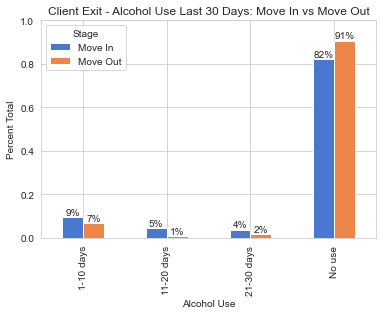

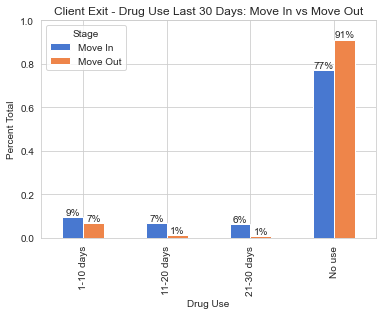

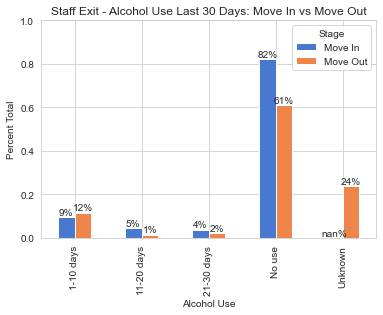

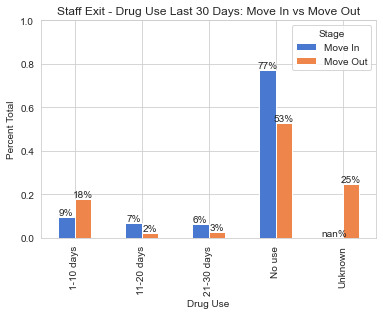

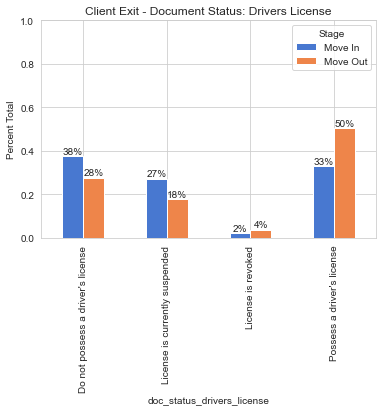

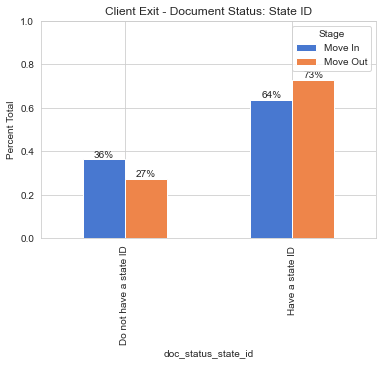

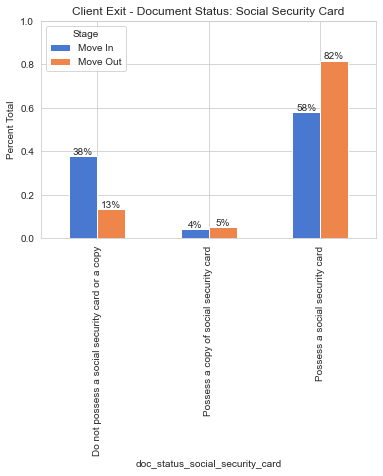

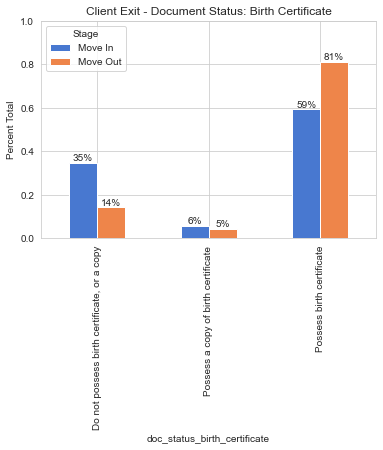

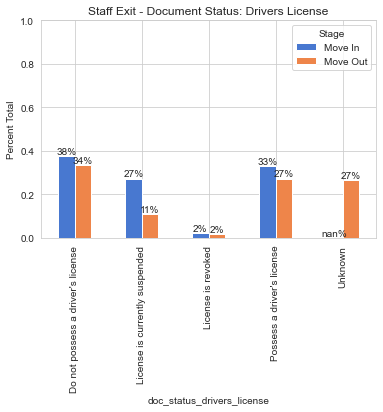

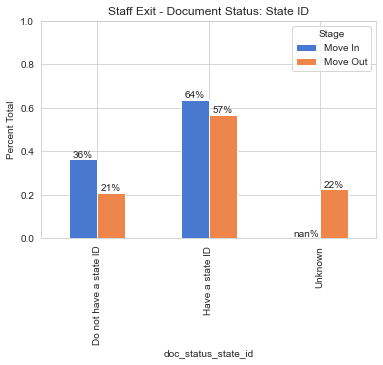

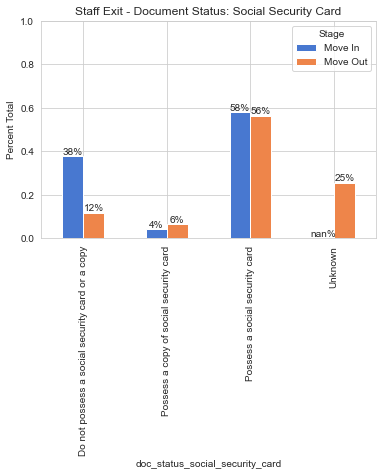

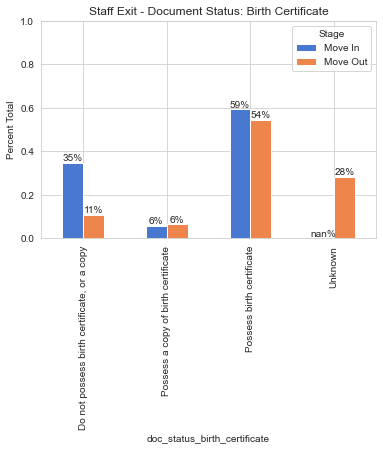

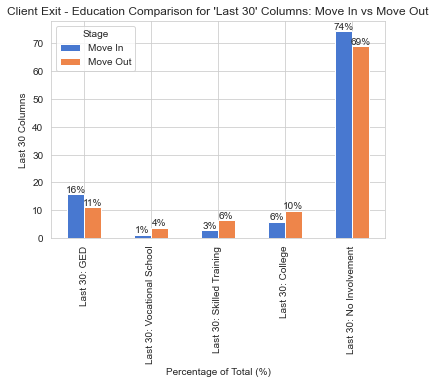

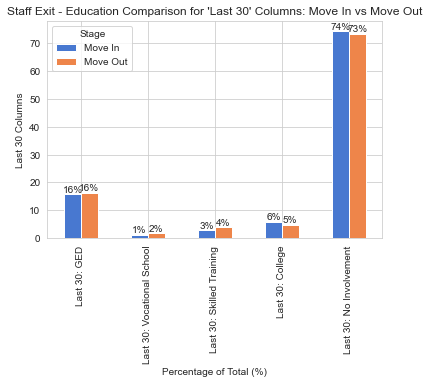

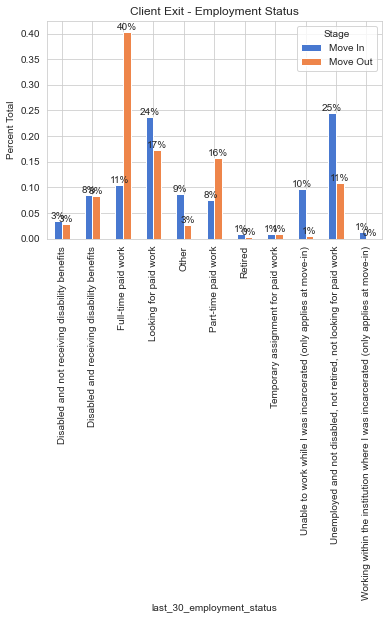

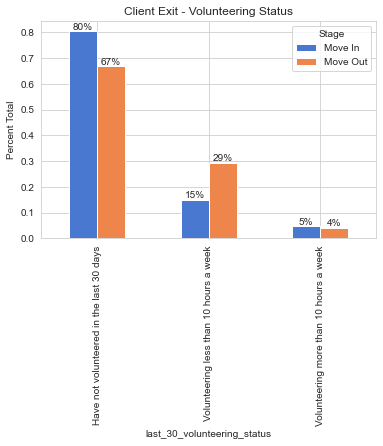

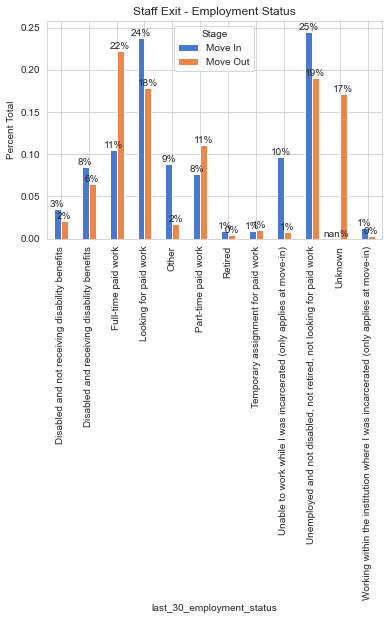

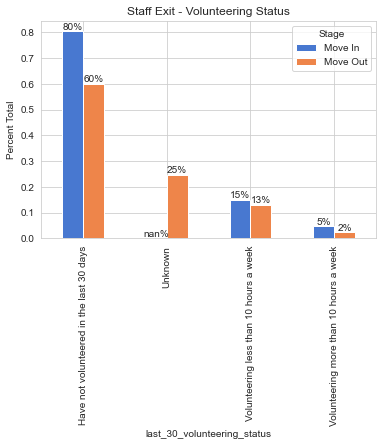

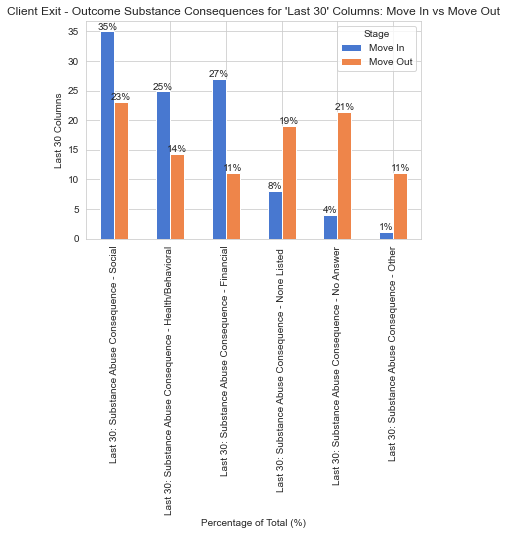

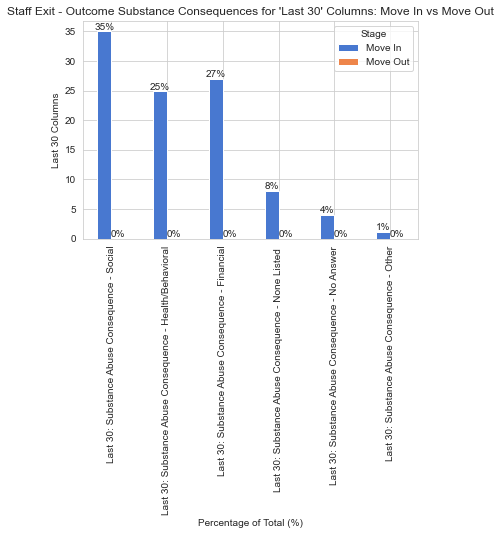

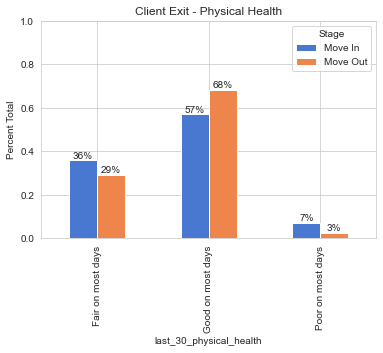

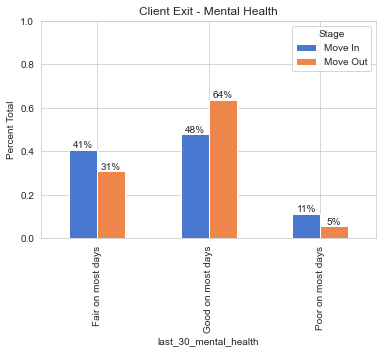

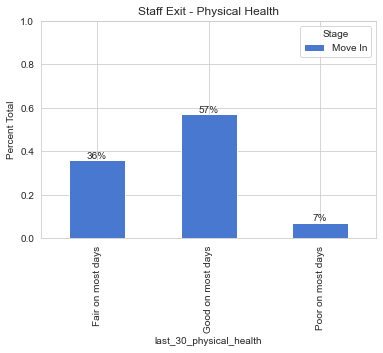

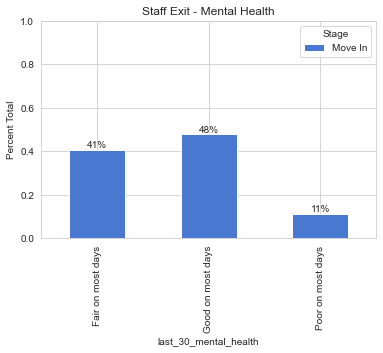

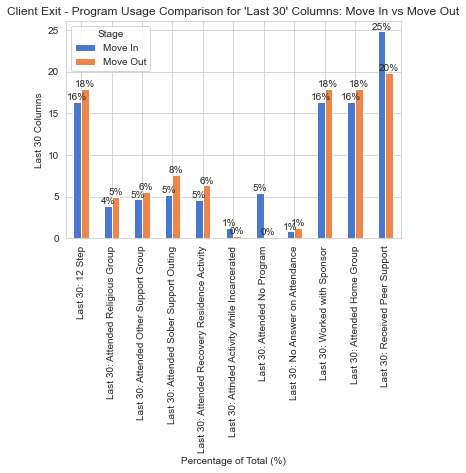

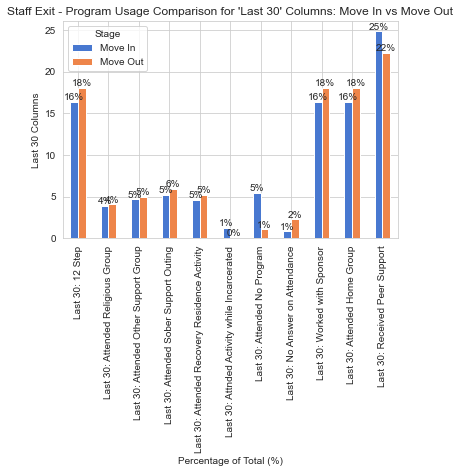

In [6]:
client_exit = orh_data[(orh_data['Stage']=='Move In') |
         ((orh_data['Stage']=='Move Out')&(orh_data['input_type']=='Client'))]

staff_exit = orh_data[(orh_data['Stage']=='Move In') |
         ((orh_data['Stage']=='Move Out')&(orh_data['input_type']=='Staff'))]

client_title = 'Client Exit'

staff_title = 'Staff Exit'

orh_all_outcome_comp_summary(client_exit, staff_exit, client_title, staff_title)

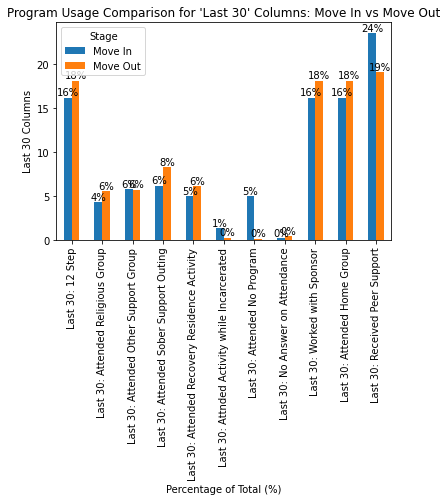

Stage
Move In     4460
Move Out    1489
dtype: int64


In [11]:
def orh_outcome_prog(input_data, graph_title = ""):
    # Participation in Recovery Programs
    out_progs = input_data[['Stage','input_type','last_30_attendance_12_step','last_30_attendance_organized_religious_group','last_30_attendance_other_support_group',
                        'last_30_attendance_sober_support_outing','last_30_attendance_activities_sponsored_by_recovery_residence',
                        'last_30_attendance_activities_provided_while_incarcerated','last_30_attendance_none', 'last_30_attendance_no_answer',
                        'last_30_attendance_working_with_sponsor','last_30_attendance_in_home_group','last_30_received_peer_support']]
    update_cols = out_progs.columns[2:]
    for col in update_cols:
        out_progs[col] = out_progs[col].fillna('NA').map(lambda x: 1 if x != 'NA' else 0)
    out_progs.columns = ['Stage','Input Type','Last 30: 12 Step','Last 30: Attended Religious Group','Last 30: Attended Other Support Group','Last 30: Attended Sober Support Outing','Last 30: Attended Recovery Residence Activity','Last 30: Attnded Activity while Incarcerated','Last 30: Attended No Program','Last 30: No Answer on Attendance','Last 30: Worked with Sponsor', 'Last 30: Attended Home Group', 'Last 30: Received Peer Support']

    out_progs = out_progs[out_progs['Input Type'] == 'Client']
    out_progs = out_progs[out_progs['Stage'] != 'Follow Up']

    
    grouped = out_progs.groupby("Stage").sum()

    # Calculate the percentage of total for each column
    total = grouped.sum(axis=1)
    percentage = grouped.div(total, axis=0) * 100

    # Transpose the DataFrame to have the "last 30" columns as rows
    percentage_t = percentage.transpose()

    # Create a horizontal stacked bar chart
    ax = percentage_t.plot(kind="bar", stacked=False)

    # Set the chart title and labels
    if graph_title == "":
        ax.set_title(f"Program Usage Comparison for 'Last 30' Columns: Move In vs Move Out")
    else:
        ax.set_title(f"{graph_title} - Program Usage Comparison for 'Last 30' Columns: Move In vs Move Out")    
    ax.set_xlabel("Percentage of Total (%)")
    ax.set_ylabel("Last 30 Columns")


    # Add percentage labels above each bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%',
                    ha='center', va='bottom')

    # Show the chart
    plt.show()

    print(total)


orh_outcome_prog(orh_female)

In [25]:
def orh_all_outcome_sub(input_data, graph_title = ""):
    # Substance User
    out_sub = input_data[['Stage','input_type','last_30_alcohol_use','last_30_illegal_drugs_non_prescribed_medications']]
    out_sub.columns = ['Stage','Input Type', 'Alcohol Use', 'Drug Use']

    #out_sub = out_sub[out_sub['Input Type'] == 'Client']
    out_sub = out_sub[out_sub['Stage'] != 'Follow Up']
    alc_out_sub = out_sub[out_sub['Alcohol Use'] != 'Prefer not to answer']

    counts = alc_out_sub.groupby(['Alcohol Use', 'Stage']).size().unstack()

    perc = counts.div(counts.sum(axis=0),axis=1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f'Alcohol Use Last 30 Days: Move In vs Move Out')
    else:
        ax.set_title(f'{graph_title} - Alcohol Use Last 30 Days: Move In vs Move Out')

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)


    dr_out_sub = out_sub[out_sub['Drug Use'] != 'Prefer not to answer']

    counts = dr_out_sub.groupby(['Drug Use', 'Stage']).size().unstack()

    perc = counts.div(counts.sum(axis=0),axis=1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f'Drug Use Last 30 Days: Move In vs Move Out')
    else:
        ax.set_title(f'{graph_title} - Drug Use Last 30 Days: Move In vs Move Out')    


    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    return out_sub



def orh_all_outcome_prog(input_data, graph_title = ""):
    # Participation in Recovery Programs
    out_progs = input_data[['Stage','input_type','last_30_attendance_12_step','last_30_attendance_organized_religious_group','last_30_attendance_other_support_group',
                        'last_30_attendance_sober_support_outing','last_30_attendance_activities_sponsored_by_recovery_residence',
                        'last_30_attendance_activities_provided_while_incarcerated','last_30_attendance_none', 'last_30_attendance_no_answer',
                        'last_30_attendance_working_with_sponsor','last_30_attendance_in_home_group','last_30_received_peer_support']]
    update_cols = out_progs.columns[2:]
    for col in update_cols:
        out_progs[col] = out_progs[col].fillna('NA').map(lambda x: 1 if x != 'NA' else 0)
    out_progs.columns = ['Stage','Input Type','Last 30: 12 Step','Last 30: Attended Religious Group','Last 30: Attended Other Support Group','Last 30: Attended Sober Support Outing','Last 30: Attended Recovery Residence Activity','Last 30: Attnded Activity while Incarcerated','Last 30: Attended No Program','Last 30: No Answer on Attendance','Last 30: Worked with Sponsor', 'Last 30: Attended Home Group', 'Last 30: Received Peer Support']

    #out_progs = out_progs[out_progs['Input Type'] == 'Client']
    out_progs = out_progs[out_progs['Stage'] != 'Follow Up']

    
    grouped = out_progs.groupby("Stage").sum()

    # Calculate the percentage of total for each column
    total = grouped.sum(axis=1)
    percentage = grouped.div(total, axis=0) * 100

    # Transpose the DataFrame to have the "last 30" columns as rows
    percentage_t = percentage.transpose()

    # Create a horizontal stacked bar chart
    ax = percentage_t.plot(kind="bar", stacked=False)

    # Set the chart title and labels
    if graph_title == "":
        ax.set_title(f"Program Usage Comparison for 'Last 30' Columns: Move In vs Move Out")
    else:
        ax.set_title(f"{graph_title} - Program Usage Comparison for 'Last 30' Columns: Move In vs Move Out")    
    ax.set_xlabel("Percentage of Total (%)")
    ax.set_ylabel("Last 30 Columns")


    # Add percentage labels above each bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%',
                    ha='center', va='bottom')

    # Show the chart
    plt.show()

    return out_progs


def orh_all_outcome_docs(input_data, graph_title = ""):
    # Personal Documents
    out_docs = input_data[['Stage','input_type','doc_status_drivers_license','doc_status_state_id','doc_status_social_security_card','doc_status_birth_certificate']]
    #out_docs.columns = [['Stage', 'Input Type', 'Drivers License', 'State ID', 'Social Security Card', 'Birth Certificate']]

    #out_docs = out_docs[out_docs['input_type'] == 'Client']
    out_docs = out_docs[out_docs['Stage'] != 'Follow Up']

    # Drivers License
    out_docs_dl = out_docs[out_docs['doc_status_drivers_license'] != 'Prefer not to answer']
    out_docs_dl = out_docs_dl.groupby(['doc_status_drivers_license', 'Stage']).size().unstack()

    perc = out_docs_dl.div(out_docs_dl.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f'Document Status: Drivers License')
    else:
        ax.set_title(f'{graph_title} - Document Status: Drivers License')    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    # State ID
    out_docs_id = out_docs[out_docs['doc_status_state_id'] != 'Prefer not to answer']
    out_docs_id = out_docs_id.groupby(['doc_status_state_id', 'Stage']).size().unstack()

    perc = out_docs_id.div(out_docs_id.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f'Document Status: State ID')
    else:
        ax.set_title(f'{graph_title} - Document Status: State ID')    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)


    # Social Security Card
    out_docs_ss = out_docs[out_docs['doc_status_social_security_card'] != 'Prefer not to answer']
    out_docs_ss = out_docs_ss.groupby(['doc_status_social_security_card', 'Stage']).size().unstack()

    perc = out_docs_ss.div(out_docs_ss.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f'Document Status: Social Security Card')
    else:
        ax.set_title(f'{graph_title} - Document Status: Social Security Card')    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)


    # Birth Certificate
    out_docs_bc = out_docs[out_docs['doc_status_birth_certificate'] != 'Prefer not to answer']
    out_docs_bc = out_docs_bc.groupby(['doc_status_birth_certificate', 'Stage']).size().unstack()

    perc = out_docs_bc.div(out_docs_bc.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f'Document Status: Birth Certificate')
    else:
        ax.set_title(f'{graph_title} - Document Status: Birth Certificate')    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    return out_docs


# Update these to include graphs!

def orh_all_outcome_educ(input_data, graph_title = ""):
    # Education Progress
    out_educ = input_data[['Stage','input_type','last_30_education_progress_ged',
    'last_30_education_progress_vocational_school',
    'last_30_education_progress_skilled_training',
    'last_30_education_progress_college',
    'last_30_education_progress_not_involved']]
    update_cols = out_educ.columns[2:]
    for col in update_cols:
        out_educ[col] = out_educ[col].fillna('NA').map(lambda x: 1 if x != 'NA' else 0)
    #out_educ.columns = [['Stage', 'Input Type', 'Last 30: GED', 'Last 30: Vocational School', 'Last 30: Skilled Training', 'Last 30: College', 'Last 30: No Involvement']]


    #out_educ = out_educ[out_educ['input_type'] == 'Client']
    out_educ = out_educ[out_educ['Stage'] != 'Follow Up']

    grouped = out_educ.groupby("Stage").sum()
    grouped.columns = ['Last 30: GED', 'Last 30: Vocational School', 'Last 30: Skilled Training', 'Last 30: College', 'Last 30: No Involvement']

    # Calculate the percentage of total for each column
    total = grouped.sum(axis=1)
    percentage = grouped.div(total, axis=0) * 100

    # Transpose the DataFrame to have the "last 30" columns as rows
    percentage_t = percentage.transpose()

    # Create a horizontal stacked bar chart
    ax = percentage_t.plot(kind="bar", stacked=False)

    # Set the chart title and labels
    if graph_title == "":
        ax.set_title(f"Education Comparison for 'Last 30' Columns: Move In vs Move Out")
    else:
        ax.set_title(f"{graph_title} - Education Comparison for 'Last 30' Columns: Move In vs Move Out")    
    ax.set_xlabel("Percentage of Total (%)")
    ax.set_ylabel("Last 30 Columns")


    # Add percentage labels above each bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%',
                    ha='center', va='bottom')

    # Show the chart
    plt.show()


    return out_educ


def orh_all_outcome_employ(input_data, graph_title = ""):
    # Employment Status
    out_emp = input_data[['Stage','input_type','last_30_employment_status',
    'last_30_volunteering_status']]

    #out_emp = out_emp[out_emp['input_type'] == 'Client']
    out_emp = out_emp[out_emp['Stage'] != 'Follow Up']

    #out_emp.columns = [['Stage', 'Input Type', 'Last 30: Employment Status', 'Last 30: Volunteering Status']]

    # Employment Status
    out_emp_emp = out_emp[out_emp['last_30_employment_status'] != 'Prefer not to answer']
    out_emp_emp = out_emp_emp.groupby(['last_30_employment_status', 'Stage']).size().unstack()

    perc = out_emp_emp.div(out_emp_emp.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f"Employment Status")
    else:
        ax.set_title(f"{graph_title} - Employment Status")    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Volunteer Status
    out_emp_vol = out_emp[out_emp['last_30_volunteering_status'] != 'Prefer not to answer']
    out_emp_vol = out_emp_vol.groupby(['last_30_volunteering_status', 'Stage']).size().unstack()

    perc = out_emp_vol.div(out_emp_vol.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f"Volunteering Status")
    else:
        ax.set_title(f"{graph_title} - Volunteering Status")    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')


    return out_emp


def orh_all_outcome_health(input_data, graph_title = ""):

    # Health Status
    out_health = input_data[['Stage','input_type','last_30_physical_health','last_30_mental_health']]

    out_health = out_health[out_health['Stage'] != 'Follow Up']
    #out_health = out_health[out_health['input_type'] == 'Client']

    # Physical Health
    out_health_phy = out_health[out_health['last_30_physical_health'] != 'Prefer not to answer']
    out_health_phy = out_health_phy.groupby(['last_30_physical_health', 'Stage']).size().unstack()

    perc = out_health_phy.div(out_health_phy.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f"Physical Health")
    else:
        ax.set_title(f"{graph_title} - Physical Health")    

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    # Mental Health
    out_health_men = out_health[out_health['last_30_mental_health'] != 'Prefer not to answer']
    out_health_men = out_health_men.groupby(['last_30_mental_health', 'Stage']).size().unstack()

    perc = out_health_men.div(out_health_men.sum(axis = 0), axis = 1)

    ax = perc.plot(kind = 'bar')
    ax.set_ylabel('Percent Total')
    if graph_title == "":
        ax.set_title(f"Mental Health")
    else:
        ax.set_title(f"{graph_title} - Mental Health")

    # Add percentage labels above each bar
    for i in range(len(ax.containers)):
        container = ax.containers[i]
        for j, val in enumerate(container):
            height = val.get_height()
            ax.text(val.get_x() + val.get_width() / 2, height, f'{perc.values[j, i]:.0%}',
                    ha='center', va='bottom')

    # Set the y-axis limits
    ax.set_ylim(0, 1)

    return out_health


def orh_all_outcome_consq(input_data, graph_title = ""):
    # Substance Use Consequences
    out_sub_consq = input_data[['Stage','input_type','last_30_substance_use_consequences_social',
        'last_30_substance_use_consequences_health_behavioral',
        'last_30_substance_use_consequences_financial',
        'last_30_substance_use_consequences_none_of_above',
        'last_30_substance_use_consequences_no_answer',
        'last_30_substance_use_consequences_other']]
    update_cols = out_sub_consq.columns[2:]
    for col in update_cols:
        out_sub_consq[col] = out_sub_consq[col].fillna('NA').map(lambda x: 1 if x != 'NA' else 0)
    
    out_sub_consq = out_sub_consq[out_sub_consq['Stage'] != 'Follow Up']
    #out_sub_consq = out_sub_consq[out_sub_consq['input_type'] == 'Client']

    grouped = out_sub_consq.groupby("Stage").sum()

    # Calculate the percentage of total for each column
    total = grouped.sum(axis=1)
    percentage = grouped.div(total, axis=0) * 100
    percentage.columns = ['Last 30: Substance Abuse Consequence - Social', 
                        'Last 30: Substance Abuse Consequence - Health/Behavioral', 'Last 30: Substance Abuse Consequence - Financial',
                        'Last 30: Substance Abuse Consequence - None Listed ', 'Last 30: Substance Abuse Consequence - No Answer',
                        'Last 30: Substance Abuse Consequence - Other']
    # Transpose the DataFrame to have the "last 30" columns as rows
    percentage_t = percentage.transpose()
    
    # Create a horizontal stacked bar chart
    ax = percentage_t.plot(kind="bar", stacked=False)

    # Set the chart title and labels
    if graph_title == "":
        ax.set_title(f"Outcome Substance Consequences for 'Last 30' Columns: Move In vs Move Out")
    else:
        ax.set_title(f"{graph_title} - Outcome Substance Consequences for 'Last 30' Columns: Move In vs Move Out")
    ax.set_xlabel("Percentage of Total (%)")
    ax.set_ylabel("Last 30 Columns")

    # Add percentage labels above each bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%',
                    ha='center', va='bottom')
            
    # Show the chart
    plt.show()

    return out_sub_consq
    

def orh_all_outcome_comp_summary(data1, data2 ,graph_title1 = '', graph_title2 = ''):

    orh_all_outcome_sub(data1, 
                    graph_title = graph_title1)
    orh_all_outcome_sub(data2, 
                    graph_title = graph_title2)
    print('\n'*20)

    orh_all_outcome_docs(data1, 
                     graph_title = graph_title1)
    orh_all_outcome_docs(data2, 
                     graph_title = graph_title2)

    print('\n'*20)

    orh_all_outcome_educ(data1, 
                     graph_title = graph_title1)
    orh_all_outcome_educ(data2, 
                     graph_title = graph_title2)

    print('\n'*20)

    orh_all_outcome_employ(data1, 
                       graph_title = graph_title1)
    orh_all_outcome_employ(data2, 
                       graph_title = graph_title2)

    print('\n'*20)

    orh_all_outcome_consq(data1, 
                      graph_title = graph_title1)
    orh_all_outcome_consq(data2, 
                      graph_title = graph_title2)

    print('\n'*20)

    orh_all_outcome_health(data1, 
                       graph_title = graph_title1)
    orh_all_outcome_health(data2, 
                       graph_title = graph_title2)
    
    print('\n'*20)

    orh_all_outcome_prog(data1, 
                     graph_title = graph_title1)
    orh_all_outcome_prog(data2, 
                     graph_title = graph_title2)
